# 1 - Loading and Handling the Data


### Lets load up the necessary libraries

+ explain each one :)


In [321]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf

plt.style.use("ggplot")

RFR = 0.0441
TRADING_DAYS = 252


### Lets import 10 stocks from Yahooo!

+ explain why these
+ mention dates


In [322]:
tickers = ["INTC", "MSFT", "TMUS", "MCD", "NKE",
           "PCG", "HLT", "FDX", "BAC", "XOM"]

groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31", auto_adjust=False)
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

df = pd.concat(groups)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,INTC,53.666466,60.840000,60.970001,60.220001,60.240002,18056000
2020-01-03,INTC,53.013721,60.099998,60.700001,59.810001,59.810001,15293900
2020-01-06,INTC,52.863762,59.930000,60.200001,59.330002,59.590000,17755200
2020-01-07,INTC,51.981674,58.930000,59.799999,58.889999,59.779999,21876100
2020-01-08,INTC,52.016964,58.970001,59.320000,58.520000,58.889999,23133500
...,...,...,...,...,...,...,...
2024-12-23,XOM,104.396103,106.300003,106.599998,104.919998,105.309998,12285100
2024-12-24,XOM,104.494308,106.400002,107.190002,105.699997,106.519997,7807000
2024-12-26,XOM,104.582695,106.489998,107.029999,105.940002,106.519997,9652400


In [323]:
df.isna().sum()

Price
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

### Since its panel data, lets pivot the dataframe [delete, moved down]


In [324]:
df_pivot = df.pivot_table(index="Date", columns="Ticker", values="Close")
df_pivot.index = pd.to_datetime(df_pivot.index, dayfirst=True) 
df_pivot.sort_index(inplace=True)
df_pivot

Ticker,BAC,FDX,HLT,INTC,MCD,MSFT,NKE,PCG,TMUS,XOM
Date,,,,,,,,,,
2020-01-02,35.639999,155.100006,111.449997,60.840000,200.789993,160.619995,102.199997,10.850000,78.589996,70.900002
2020-01-03,34.900002,153.179993,109.989998,60.099998,200.080002,158.619995,101.919998,10.570000,78.169998,70.330002
2020-01-06,34.849998,153.300003,109.419998,59.930000,202.330002,159.029999,101.830002,10.380000,78.620003,70.870003
2020-01-07,34.619999,154.800003,108.290001,58.930000,202.630005,157.580002,101.779999,10.580000,78.919998,70.290001
2020-01-08,34.970001,157.130005,109.209999,58.970001,205.910004,160.089996,101.550003,10.610000,79.419998,69.230003
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,43.889999,269.010010,250.710007,20.200001,291.290009,435.250000,76.760002,19.990000,221.660004,106.300003
2024-12-24,44.380001,271.839996,253.259995,20.400000,293.989990,439.329987,76.790001,20.219999,223.009995,106.400002
2024-12-26,44.549999,278.660004,251.759995,20.440001,294.799988,438.109985,76.940002,20.209999,223.679993,106.489998


### Check for missing values:


In [325]:
df.isna().sum() #check for missing values

Price
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

# 2 - Data Exploration

#### The head of the pivoted data, shows the first five trading days of our time frame, and the closing price for each stock in the portfolio

In [326]:
df_pivot.head()

Ticker,BAC,FDX,HLT,INTC,MCD,MSFT,NKE,PCG,TMUS,XOM
Date,,,,,,,,,,
2020-01-02,35.639999,155.100006,111.449997,60.840000,200.789993,160.619995,102.199997,10.85,78.589996,70.900002
2020-01-03,34.900002,153.179993,109.989998,60.099998,200.080002,158.619995,101.919998,10.57,78.169998,70.330002
2020-01-06,34.849998,153.300003,109.419998,59.930000,202.330002,159.029999,101.830002,10.38,78.620003,70.870003
2020-01-07,34.619999,154.800003,108.290001,58.930000,202.630005,157.580002,101.779999,10.58,78.919998,70.290001
2020-01-08,34.970001,157.130005,109.209999,58.970001,205.910004,160.089996,101.550003,10.61,79.419998,69.230003


#### tail:

In [327]:
df_pivot.tail()

Ticker,BAC,FDX,HLT,INTC,MCD,MSFT,NKE,PCG,TMUS,XOM
Date,,,,,,,,,,
2024-12-23,43.889999,269.010010,250.710007,20.200001,291.290009,435.250000,76.760002,19.990000,221.660004,106.300003
2024-12-24,44.380001,271.839996,253.259995,20.400000,293.989990,439.329987,76.790001,20.219999,223.009995,106.400002
2024-12-26,44.549999,278.660004,251.759995,20.440001,294.799988,438.109985,76.940002,20.209999,223.679993,106.489998
2024-12-27,44.340000,280.359985,249.940002,20.299999,293.619995,430.529999,76.419998,20.139999,223.020004,106.480003
2024-12-30,43.910000,280.549988,248.199997,19.820000,289.600006,424.829987,74.650002,20.129999,220.660004,105.760002


## Lets plot the performance of the stocks:

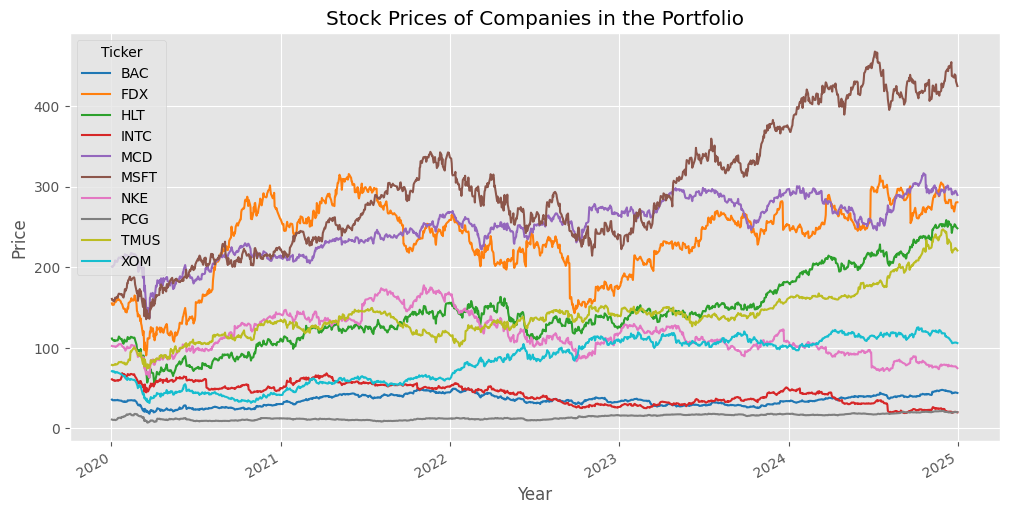

<Figure size 640x480 with 0 Axes>

In [328]:

# copilot used so every stock has a different color (BAC and INTC were the same color):
colors = mpl.colormaps['tab10']
df_pivot.plot(figsize=(12, 6), color=[colors(i) for i in range(0,10)])
###

plt.title("Stock Prices of Companies in the Portfolio")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="Ticker")
plt.show()
plt.tight_layout()

# 3 - BACKTESTING

##### caclulating the simple retruns 

In [329]:
df["SimpleReturns"] = df.groupby("Ticker").Close.pct_change()

#### calculating the 20-day moving avaragers and standard deviation of the close price


In [330]:
# Calculate rolling mean and std per ticker
df["SMA"] = df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(window=20).mean())
df["Dev"] = df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(window=20).std())


### using the simple moving avarages to calculate the upper and lower band and then creating a signal 

In [331]:
df["HighBand"] = df["SMA"] + (2 * df["Dev"])
df["LowBand"] = df["SMA"] - (2 * df["Dev"])

# Initialize Signal as 0 (no signal)
df["Signal"] = np.nan

# Set signals: 1 for breakout above, -1 for breakout below& (df.Close > df.SMA) ; & (df.Close < df.SMA)
df.Signal = np.where((df.Close > df.HighBand) & (df.Close > df.SMA), -1, df.Signal)
df.Signal = np.where((df.Close < df.LowBand) & (df.Close < df.SMA), 1, df.Signal)

# Forward fill signals per ticker, then fill remaining NaN with 0
df.Signal = df.groupby("Ticker").Signal.ffill().fillna(0)

######

df["Position"] = df.groupby("Ticker").Signal.shift()
df["Strategy"] = df.SimpleReturns * df.Position
df.Strategy.fillna(0)

df

Price,Ticker,Adj Close,Close,High,Low,Open,Volume,SimpleReturns,SMA,Dev,HighBand,LowBand,Signal,Position,Strategy
Date,,,,,,,,,,,,,,,
2020-01-02,INTC,53.666466,60.840000,60.970001,60.220001,60.240002,18056000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-03,INTC,53.013721,60.099998,60.700001,59.810001,59.810001,15293900,-0.012163,NaN,NaN,NaN,NaN,0.0,0.0,-0.000000
2020-01-06,INTC,52.863762,59.930000,60.200001,59.330002,59.590000,17755200,-0.002829,NaN,NaN,NaN,NaN,0.0,0.0,-0.000000
2020-01-07,INTC,51.981674,58.930000,59.799999,58.889999,59.779999,21876100,-0.016686,NaN,NaN,NaN,NaN,0.0,0.0,-0.000000
2020-01-08,INTC,52.016964,58.970001,59.320000,58.520000,58.889999,23133500,0.000679,NaN,NaN,NaN,NaN,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,XOM,104.396103,106.300003,106.599998,104.919998,105.309998,12285100,0.004062,112.6220,4.674072,121.970144,103.273856,1.0,1.0,0.004062
2024-12-24,XOM,104.494308,106.400002,107.190002,105.699997,106.519997,7807000,0.000941,111.9435,4.534110,121.011720,102.875280,1.0,1.0,0.000941
2024-12-26,XOM,104.582695,106.489998,107.029999,105.940002,106.519997,9652400,0.000846,111.3695,4.457031,120.283562,102.455438,1.0,1.0,0.000846


In [332]:

df["BB_Com_Return"] = (1 + (df.Strategy)).groupby(df.Ticker).cumprod() - 1
df["CumulativeReturns"] = (1 + df.SimpleReturns).groupby(df["Ticker"]).cumprod() - 1

df

Price,Ticker,Adj Close,Close,High,Low,Open,Volume,SimpleReturns,SMA,Dev,HighBand,LowBand,Signal,Position,Strategy,BB_Com_Return,CumulativeReturns
Date,,,,,,,,,,,,,,,,,
2020-01-02,INTC,53.666466,60.840000,60.970001,60.220001,60.240002,18056000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-03,INTC,53.013721,60.099998,60.700001,59.810001,59.810001,15293900,-0.012163,NaN,NaN,NaN,NaN,0.0,0.0,-0.000000,0.000000,-0.012163
2020-01-06,INTC,52.863762,59.930000,60.200001,59.330002,59.590000,17755200,-0.002829,NaN,NaN,NaN,NaN,0.0,0.0,-0.000000,0.000000,-0.014957
2020-01-07,INTC,51.981674,58.930000,59.799999,58.889999,59.779999,21876100,-0.016686,NaN,NaN,NaN,NaN,0.0,0.0,-0.000000,0.000000,-0.031394
2020-01-08,INTC,52.016964,58.970001,59.320000,58.520000,58.889999,23133500,0.000679,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000,-0.030736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,XOM,104.396103,106.300003,106.599998,104.919998,105.309998,12285100,0.004062,112.6220,4.674072,121.970144,103.273856,1.0,1.0,0.004062,-0.513800,0.499295
2024-12-24,XOM,104.494308,106.400002,107.190002,105.699997,106.519997,7807000,0.000941,111.9435,4.534110,121.011720,102.875280,1.0,1.0,0.000941,-0.513343,0.500705
2024-12-26,XOM,104.582695,106.489998,107.029999,105.940002,106.519997,9652400,0.000846,111.3695,4.457031,120.283562,102.455438,1.0,1.0,0.000846,-0.512931,0.501975


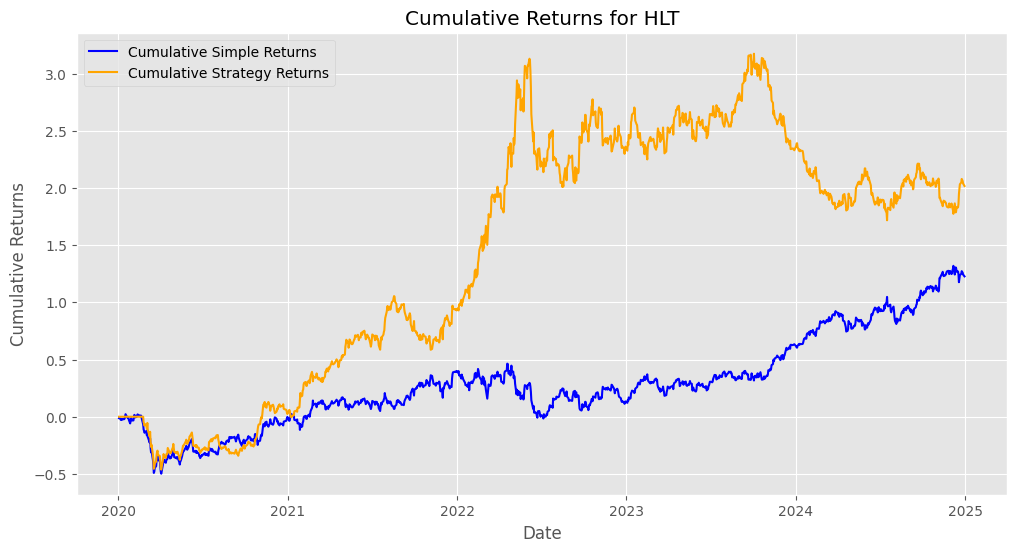

/tmp/ipykernel_25945/3530838866.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_ticker["SMA"] = df_first_ticker["Close"].rolling(window=20).mean()


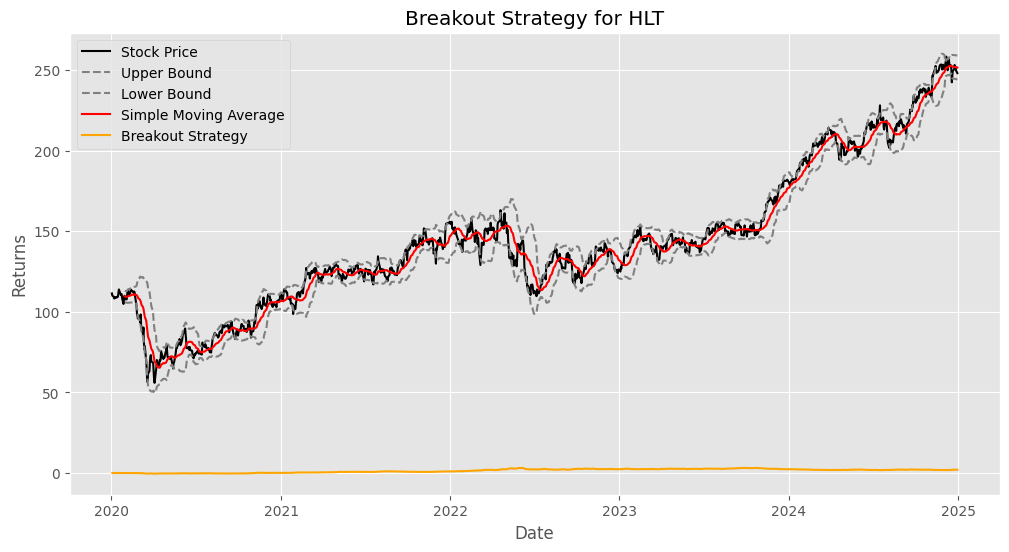

In [333]:

# PLOT CUMULATIVE SIMPLE RETURNS VS STRATEGY RETURNS FOR THE FIRST TICKER
first_ticker = df["Ticker"].unique()[6]
df_first_ticker = df[df["Ticker"] == first_ticker]
plt.figure(figsize=(12, 6))
plt.plot(df_first_ticker.index, df_first_ticker["CumulativeReturns"], label="Cumulative Simple Returns", color="blue")
plt.plot(df_first_ticker.index, df_first_ticker["BB_Com_Return"], label="Cumulative Strategy Returns", color="orange")
plt.title(f"Cumulative Returns for {first_ticker}")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# plot simple moving avarage, stock price and breakout strategy
plt.figure(figsize=(12, 6))
plt.plot(df_first_ticker.index, df_first_ticker["Close"], label="Stock Price", color="black")
# visualise the higher and lower bounds i have already calculated them
plt.plot(df_first_ticker.index, df_first_ticker["HighBand"], label="Upper Bound", color="gray", linestyle='--')
plt.plot(df_first_ticker.index, df_first_ticker["LowBand"], label="Lower Bound", color="gray", linestyle='--')

df_first_ticker["SMA"] = df_first_ticker["Close"].rolling(window=20).mean()
plt.plot(df_first_ticker.index, df_first_ticker["SMA"], label="Simple Moving Average", color="red")
plt.plot(df_first_ticker.index, df_first_ticker["BB_Com_Return"], label="Breakout Strategy", color="orange")
plt.title(f"Breakout Strategy for {first_ticker}")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()





### Display the strategy return vs Buy&Hold

In [334]:
final_returns = df.groupby("Ticker")[["CumulativeReturns", "BB_Com_Return"]].last()
final_returns


Price,CumulativeReturns,BB_Com_Return
Ticker,,
BAC,0.232043,-0.473062
FDX,0.808833,-0.724928
HLT,1.227008,2.017174
INTC,-0.674227,2.305916
MCD,0.442303,-0.166838
MSFT,1.644938,-0.123783
NKE,-0.269569,-0.199757
PCG,0.855299,-0.602400
TMUS,1.807737,0.395279


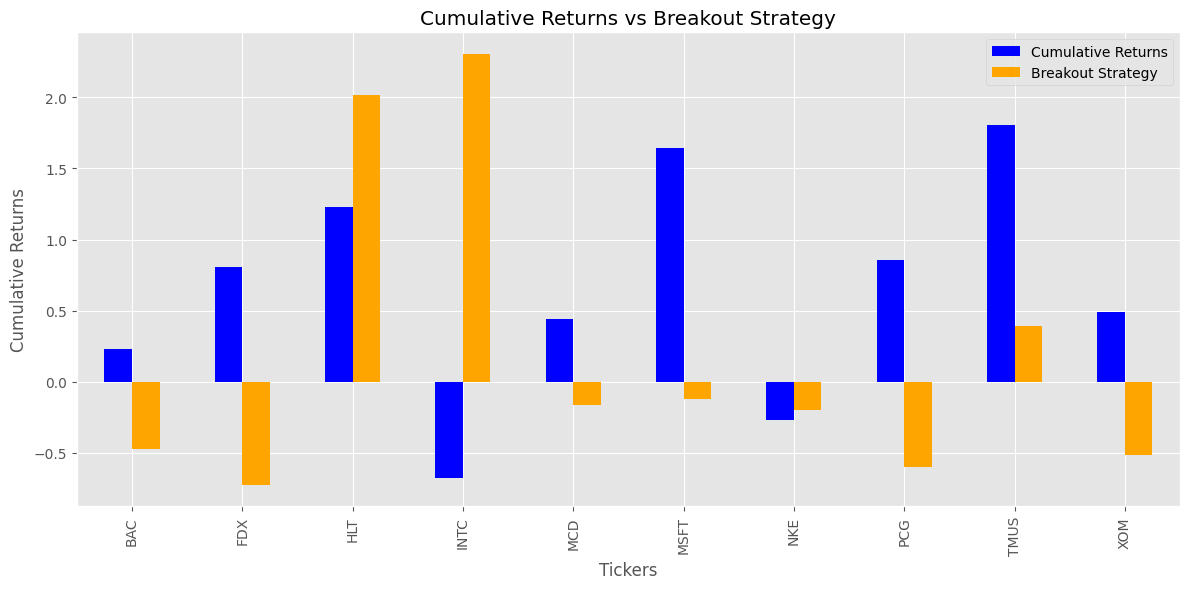

In [335]:

# plot cumulative returns vs breakout strategy
final_returns.plot(kind="bar", figsize=(12, 6), color=["blue", "orange"])
plt.title("Cumulative Returns vs Breakout Strategy")
plt.xlabel("Tickers")
plt.ylabel("Cumulative Returns")
plt.legend(["Cumulative Returns", "Breakout Strategy"])
plt.tight_layout()
plt.show()


# 4 - PORTFOLIO MANAGEMENT

+ Visualise the portfolio by plotting the correlation matrix of its simple daily returns.


In [336]:
# PLOT CORRELATION MATRIX OF SIMPLE RETURNS OF PORTFOLIO WITH EQUAL WEIGHTS 




+ SIMPLE PORTFOLIO - EQUAL WEIGHTS


In [337]:


df = df_pivot.loc[:, ["BAC", "FDX", "HLT", "INTC", "MCD", "MSFT", "NKE", "PCG", "TMUS", "XOM"]]
df

weights = np.ones(10) / 10
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [338]:
# Calculate daily portfolio returns with equal weights
returns = df_pivot.pct_change()
returns.dropna(inplace=True)
returns["DailyPortfolioReturn"] = returns.dot(weights)

# Calculate cumulative returns for the portfolio
returns["CumulativePortfolioReturn"] = (1 + returns["DailyPortfolioReturn"]).cumprod() - 1

# Show the updated returns table
returns.head()

p_return = returns["DailyPortfolioReturn"]
p_volatility = p_return.std()


In [339]:
p_return

Date
2020-01-03   -0.011632
2020-01-06   -0.000025
2020-01-07   -0.001705
2020-01-08    0.005828
2020-01-09    0.001530
                ...   
2024-12-23    0.001788
2024-12-24    0.007933
2024-12-26    0.003024
2024-12-27   -0.004726
2024-12-30   -0.010756
Name: DailyPortfolioReturn, Length: 1256, dtype: float64

In [340]:
# Calculate the daily standard deviation of portfolio returns for each day as a risk measurement.
daily_std = returns["DailyPortfolioReturn"].rolling(2).std()
daily_std
p_volatility

np.float64(0.014565793595723355)

# 5. OPTIMISATION

In [341]:
annualised_return = p_return.mean() * TRADING_DAYS
annualised_volatility = p_volatility * np.sqrt(TRADING_DAYS)

print(
    f"""
    Annualised return is {annualised_return}
    \nAnnualised volatility is {annualised_volatility}
     """
)
returns_opt = returns.iloc[:, :10]
returns_opt


    Annualised return is 0.13203299426426998
    
Annualised volatility is 0.2312248050154877
     


Ticker,BAC,FDX,HLT,INTC,MCD,MSFT,NKE,PCG,TMUS,XOM
Date,,,,,,,,,,
2020-01-03,-0.020763,-0.012379,-0.013100,-0.012163,-0.003536,-0.012452,-0.002740,-0.025807,-0.005344,-0.008039
2020-01-06,-0.001433,0.000783,-0.005182,-0.002829,0.011246,0.002585,-0.000883,-0.017975,0.005757,0.007678
2020-01-07,-0.006600,0.009785,-0.010327,-0.016686,0.001483,-0.009118,-0.000491,0.019268,0.003816,-0.008184
2020-01-08,0.010110,0.015052,0.008496,0.000679,0.016187,0.015928,-0.002260,0.002836,0.006336,-0.015080
2020-01-09,0.001716,0.005855,-0.001099,0.005596,0.011850,0.012493,-0.000689,-0.032988,0.004911,0.007656
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-0.006339,-0.024372,0.005172,0.034836,-0.004749,-0.003092,-0.002339,0.008577,0.006128,0.004062
2024-12-24,0.011164,0.010520,0.010171,0.009901,0.009269,0.009374,0.000391,0.011506,0.006090,0.000941
2024-12-26,0.003831,0.025088,-0.005923,0.001961,0.002755,-0.002777,0.001953,-0.000495,0.003004,0.000846


In [ ]:
def negative_sharpe(weights): #finding the sharpe ration (need returns -> annual_r and annual_v)

    opt_p_returns = np.dot(returns_opt, weights)

    annualised_returns = opt_p_returns.mean() * TRADING_DAYS
    annualised_volatility = opt_p_returns.std() * np.sqrt(TRADING_DAYS)
    
    SharpeRatio = (annualised_returns - RFR) / (annualised_volatility)

    return -SharpeRatio 

In [343]:
#our constraint is that the weights should add up to 1.00 

constrain = {"type" : "eq", "fun": lambda x: sum(x) - 1 } #set the type to eq => eqals,
# then specify the actual constrain (using fun=>function),
# which fun in fact is lmbda dunction where all weights added up are eqaul to 1 (1-1 = 0)

bounds = tuple((0,1) for x in range(10)) 
#first (0,1) shows the minimum and maximum it can assing for waights,
# then the range of how many securities we have aka 5 (using comperhansion)

init_weights = np.ones(10) / 10 # static weights

optimal = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=constrain)
#atr1 = function we try to min, #atr2 = initial weights, #bounds (min/max per weight), #constrain

opt_weights = optimal.x
opt_weights * 100



array([0.00000000e+00, 7.04041530e-14, 1.63234556e+01, 0.00000000e+00,
       0.00000000e+00, 3.00458893e+01, 0.00000000e+00, 2.29500220e+00,
       5.13356530e+01, 4.74470760e-14])

Returns of Optimised portfolio:

In [351]:
opt_p_returns = np.dot(returns_opt, opt_weights)
opt_p_returns
returns["OptimisedPortfolioReturn"] = returns_opt.dot(opt_weights)
returns
# Calculate cumulative returns for the optimised portfolio
returns["CumulativeOptimisedPortfolioReturn"] = (1 + returns["OptimisedPortfolioReturn"]).cumprod() - 1
# Show the updated returns table
returns.head()


Ticker,BAC,FDX,HLT,INTC,MCD,MSFT,NKE,PCG,TMUS,XOM,DailyPortfolioReturn,CumulativePortfolioReturn,OptimisedPortfolioReturn,CumulativeOptimisedPortfolioReturn
Date,,,,,,,,,,,,,,
2020-01-03,-0.020763,-0.012379,-0.013100,-0.012163,-0.003536,-0.012452,-0.002740,-0.025807,-0.005344,-0.008039,-0.011632,-0.011632,-0.009215,-0.009215
2020-01-06,-0.001433,0.000783,-0.005182,-0.002829,0.011246,0.002585,-0.000883,-0.017975,0.005757,0.007678,-0.000025,-0.011657,0.002473,-0.006765
2020-01-07,-0.006600,0.009785,-0.010327,-0.016686,0.001483,-0.009118,-0.000491,0.019268,0.003816,-0.008184,-0.001705,-0.013343,-0.002024,-0.008775
2020-01-08,0.010110,0.015052,0.008496,0.000679,0.016187,0.015928,-0.002260,0.002836,0.006336,-0.015080,0.005828,-0.007592,0.009490,0.000632
2020-01-09,0.001716,0.005855,-0.001099,0.005596,0.011850,0.012493,-0.000689,-0.032988,0.004911,0.007656,0.001530,-0.006074,0.005338,0.005973


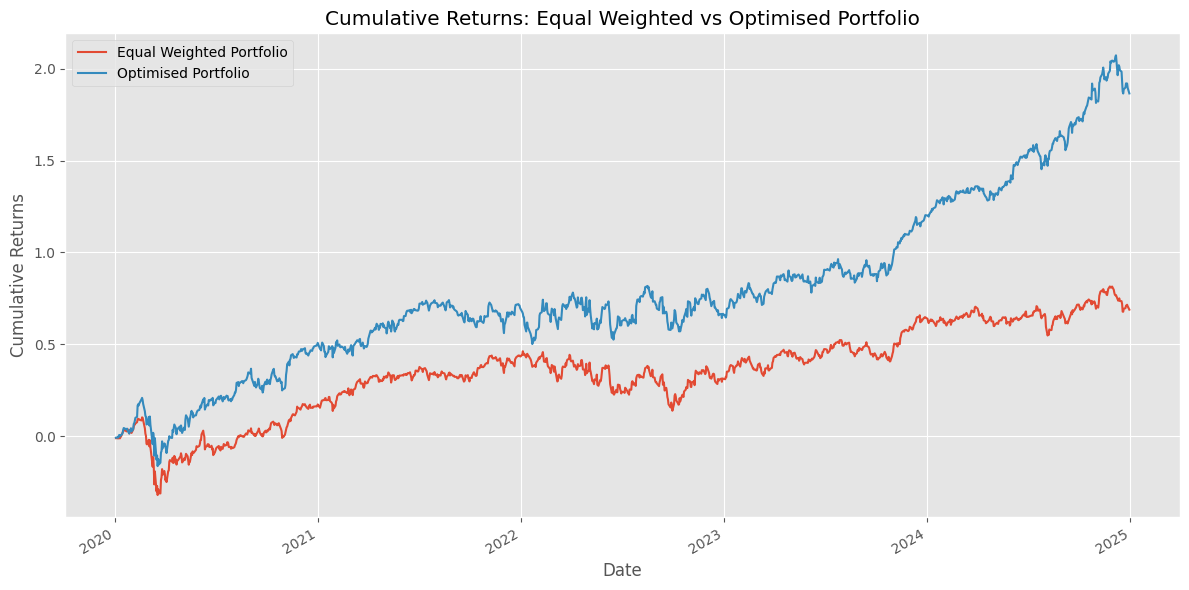

In [352]:
# ploy cumulative returns of optimised portfolio vs equal weighted portfolio
returns[["CumulativePortfolioReturn", "CumulativeOptimisedPortfolioReturn"]].plot(figsize=(12, 6))
plt.title("Cumulative Returns: Equal Weighted vs Optimised Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(["Equal Weighted Portfolio", "Optimised Portfolio"])
plt.tight_layout()
plt.show()
